In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model



In [12]:
df = [pd.read_csv('./CSV_Files/user_' + user + '.csv') for user in ['a','b','c','d']]
df
data  = pd.concat(df, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)
# data

In [13]:
data.shape

(11520, 113)

In [14]:
y = data['Class']
x = data.drop('Class', axis=1)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state=60)

# from sklearn.preprocessing import StandardScaler
X_train = np.array(x_train).reshape(-1,1)
X_test = np.array(x_test).reshape(-1,1)
# Y_train = np.array(y_train).reshape(-1,1)
# Y_test = np.array(y_test).reshape(-1,1)
# scaler = StandardScaler().fit(X_train)
# scaler = StandardScaler().fit(X_test)

# X_train_scaled = pd.DataFrame(scaler.transform(X_train))
# X_train_scaled.std(axis=0)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))
# X_test_scaled.std(axis=0)

In [16]:
from sklearn.svm import SVC
model = SVC() #gamma = 10(42), gamma=10&kernel='linear'(46)
model.fit(x_train, y_train)

SVC()

In [17]:
model.score(x_test,y_test)*100

34.765625

In [18]:
#hyperparameters

parameters = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'C': [1,5,10,20]
}

In [19]:
#grid Search
from sklearn.model_selection import GridSearchCV
classifier = GridSearchCV(model, parameters, cv = 5)
classifier.fit(x_train,y_train)

ValueError: X should be a square kernel matrix

Text(33.22222222222222, 0.5, 'Truth')

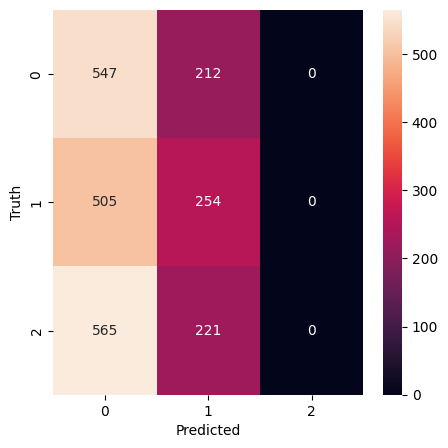

In [ ]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix  
ConfusionMatrix = confusion_matrix(y_test, model.predict(x_test))

plt.figure(figsize=(5,5))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# from sklearn.linear_model import Ridge
# Ridge_reg = Ridge(alpha= 50, max_iter = 10000, tol = 0.5)
# Ridge_reg.fit(x_train,y_train)
# Ridge_reg.score(x_test,y_test)*100